## Homework Set 2: Fourier Transforms in Multiple Dimensions

In [29]:
## MP 573 HW2
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal, ndimage, misc

## 1.3: Magnitude vs Phase

Load the MAT-file dogcat.mat, which contains 2 images (im1 and im2). Calculate the 2D (discrete) Fourier Transform of each of these images (eg: using the command fftn). 

A. Create a mixed image by using the magnitude from the Fourier Transform of im1, and the phase from the Fourier Transform of im2, and then performing a 2D (discrete) inverse Fourier Transform (eg: using the command ifftn). Does this mixed image look more like im1 or im2?

B. Create another mixed image by using the magnitude from the Fourier Transform of im2, and the phase from the Fourier Transform of im1, and then performing a 2D (discrete) inverse Fourier Transform (eg: using the command ifftn). Does this mixed image look more like im1 or im2?

What does this little experiment suggest about the relative importance of the magnitude vs the phase of the Fourier Transform of an image? 

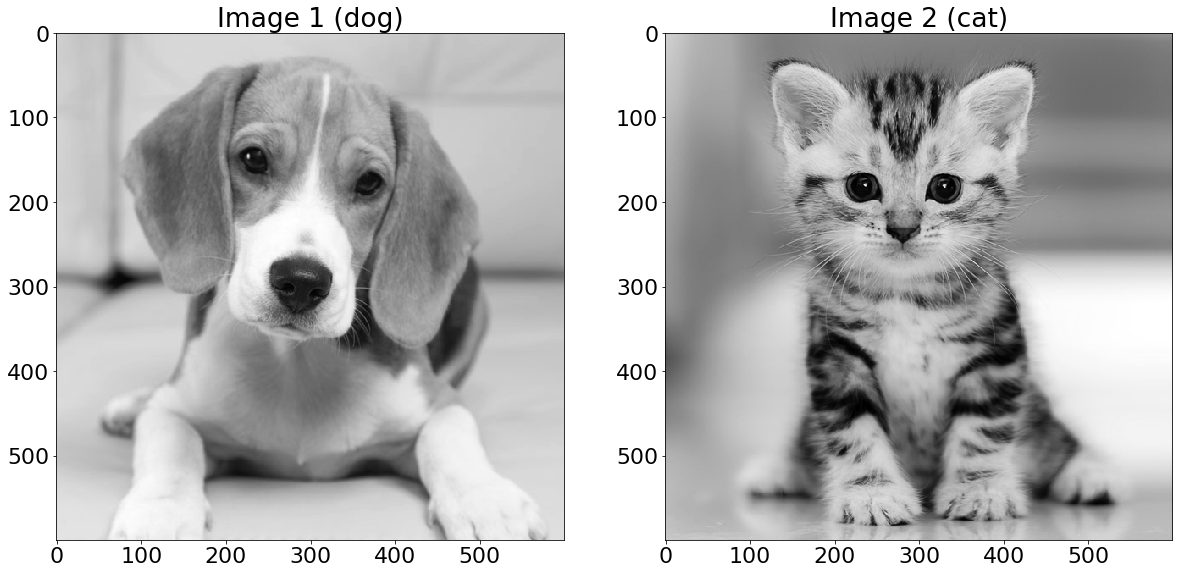

In [61]:
# Load our two images
from os.path import dirname, join as pjoin
import scipy.io as sio
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'dogcat.mat')
mat_contents = sio.loadmat(mat_fname)
im1 = mat_contents['im1']
im2 = mat_contents['im2']

# Show the images
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
font = {'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)
plt.title('Image 1 (dog)')
imgplot = plt.imshow(abs(im1),cmap='gray')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.title('Image 2 (cat)')
imgplot = plt.imshow(abs(im2),cmap='gray')

# To-do: calculate Fourier transforms of our images

# To-Do: Create mixed images (imA and imB) in the Fourier domain

# To-Do: Transform back to spatial domain

# To-Do: Show the two "mixed" images



## 3. Rotation and Fourier transforms

Run the Jupyter notebook cell that generates a 'triangle' shaped image to create an array f  with a 2D triangle function  $f(x,y) = \Delta(x) \Delta (2y)$ within it.

A. Find the 2D (Discrete) Fourier transform (fhat) of this function and provide the  log magnitude plot of fhat. 

B. Obtain a second image f2 by rotating the image f by 20 degrees using the Python function ndimage.rotate(array, angle) (feel free to use the documentation for this simple function). Calculate the 2D DFT of the rotated image f2, and provide the log magnitude plot of fhat2(u,v). Repeat this for rotations of 90 and $-20$ degrees.  

C. Describe the main changes you observe in Fourier space as you rotate the matrix. Do not worry about slight inaccuracies in the FT of the rotated image for now - these are due to our discretization. Can you  explain the relationship between these two FTs (original vs rotated image) in terms of a property of the Fourier Transform? 

Note:  Displaying log(abs(fhat)) will sometimes cause log of 0 errors and amplify slight discrepancies.  Displaying the log(abs(fhat) + 1) will solve this problem but be careful to have the proper dynamic range in fhat so that adding 1 does not significantly alter the main components of the plot. 

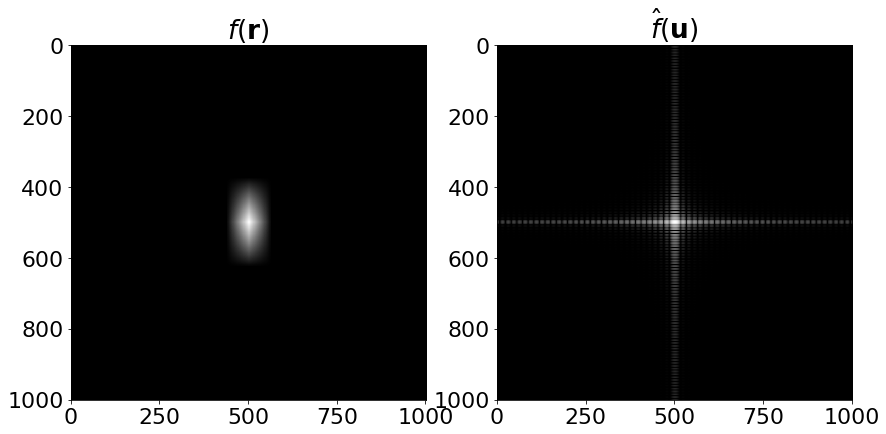

In [60]:
# Create a triangle-shaped signal in 2D
N = 1001
xmax = 4
x = np.linspace(-xmax,xmax,N)
y = x.T;
fx = 1.0*(abs(x)<0.5);
fx = signal.convolve(fx, fx, mode='same')
fy = 1.0*(abs(y)<0.25);
fy = signal.convolve(fy, fy, mode='same')
f = np.outer(fx,fy)

# Calculate the Fourier transform
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))/np.sqrt(f.size)

# Display f and its Fourier transform
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.title('$f(\mathbf{r})$')
imgplot = plt.imshow(abs(f),cmap='gray')

plt.subplot(1,2,2)
plt.rc('font', **font)
plt.title('$\hat{f}(\mathbf{u})$')
imgplot = plt.imshow(np.log(abs(fhat)+1),cmap='gray')

# To-Do: Rotate f by some angle (to create f2)

# To-Do: Calculate the Fourier transform of f2

# To-Do: Display the rotated image f2 and its Fourier transform fhat2

